## Data Description and Analysis

In [49]:
# !pip install squarify

In [50]:
import numpy as np
import pandas as pd
import gc
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

root = 'C:/Users/Pratham/Documents/GitHub/instacart-customer-purchase-prediction/data/'

In [51]:
import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)


In [52]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')

In [53]:
aisles.head()         # First 5 rows



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [54]:
aisles.tail()

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [55]:
aisles.sample(5)      # Random 5 rows

,aisle_id,aisle
81,82,baby accessories
128,129,frozen appetizers sides
73,74,dish detergents
122,123,packaged vegetables fruits
133,134,specialty wines champagnes


In [56]:
aisles.shape

(134, 2)

In [57]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [58]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [59]:
len(aisles.aisle.unique())

134

In [60]:
aisles.aisle.unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

In [61]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [62]:
departments.tail()

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [63]:
len(departments.department.unique())

21

In [64]:
departments.department.unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

In [65]:
orders.head(12)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.00
2,473747,1,prior,3,3,12,21.00
3,2254736,1,prior,4,4,7,29.00
4,431534,1,prior,5,4,15,28.00
5,3367565,1,prior,6,2,7,19.00
6,550135,1,prior,7,1,9,20.00
7,3108588,1,prior,8,1,14,14.00
8,2295261,1,prior,9,1,16,0.00
9,2550362,1,prior,10,4,8,30.00


In [66]:
orders.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.00
3421079,1854736,206209,prior,11,4,10,30.00
3421080,626363,206209,prior,12,1,12,18.00
3421081,2977660,206209,prior,13,1,12,7.00
3421082,272231,206209,train,14,6,14,30.00


In [67]:

orders.describe()  # Statistics for numerical columns



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3421083.00,3421083.00,3421083.00,3421083.00,3421083.00,3214874.00
mean,1710542.00,102978.21,17.15,2.78,13.45,11.11
std,987581.74,59533.72,17.73,2.05,4.23,9.21
min,1.00,1.00,1.00,0.00,0.00,0.00
25%,855271.50,51394.00,5.00,1.00,10.00,4.00
50%,1710542.00,102689.00,11.00,3.00,13.00,7.00
75%,2565812.50,154385.00,23.00,5.00,16.00,15.00
max,3421083.00,206209.00,100.00,6.00,23.00,30.00


In [68]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [69]:
len(orders.order_id.unique())

3421083

In [70]:
len(orders.user_id.unique())

206209

In [71]:
orders.eval_set.value_counts()

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

In [72]:
orders.order_number.describe().apply(lambda x: format(x, '.2f'))

count    3421083.00
mean          17.15
std           17.73
min            1.00
25%            5.00
50%           11.00
75%           23.00
max          100.00
Name: order_number, dtype: object

In [73]:
order_products_prior.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [74]:
order_products_prior.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [75]:
len(order_products_prior.order_id.unique())

3214874

In [76]:
len(order_products_prior.product_id.unique())

49677

In [77]:
order_products_prior['add_to_cart_order'].describe()  # Position of products in cart

count   32434489.00
mean           8.35
std            7.13
min            1.00
25%            3.00
50%            6.00
75%           11.00
max          145.00
Name: add_to_cart_order, dtype: float64

In [78]:
order_products_train.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [79]:
order_products_train.tail()

,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [80]:
len(order_products_train.order_id.unique())

131209

In [81]:
len(order_products_train.product_id.unique())

39123

In [82]:
order_products_train.describe()  # Summary statistics

,order_id,product_id,add_to_cart_order,reordered
count,1384617.00,1384617.00,1384617.00,1384617.00
mean,1706297.62,25556.24,8.76,0.60
std,989732.65,14121.27,7.42,0.49
min,1.00,1.00,1.00,0.00
25%,843370.00,13380.00,3.00,0.00
50%,1701880.00,25298.00,7.00,1.00
75%,2568023.00,37940.00,12.00,1.00
max,3421070.00,49688.00,80.00,1.00


In [83]:
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [84]:
products.tail()

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [85]:
len(products.product_name.unique())

49688

In [86]:
len(products.aisle_id.unique())

134

In [87]:
len(products.department_id.unique())

21

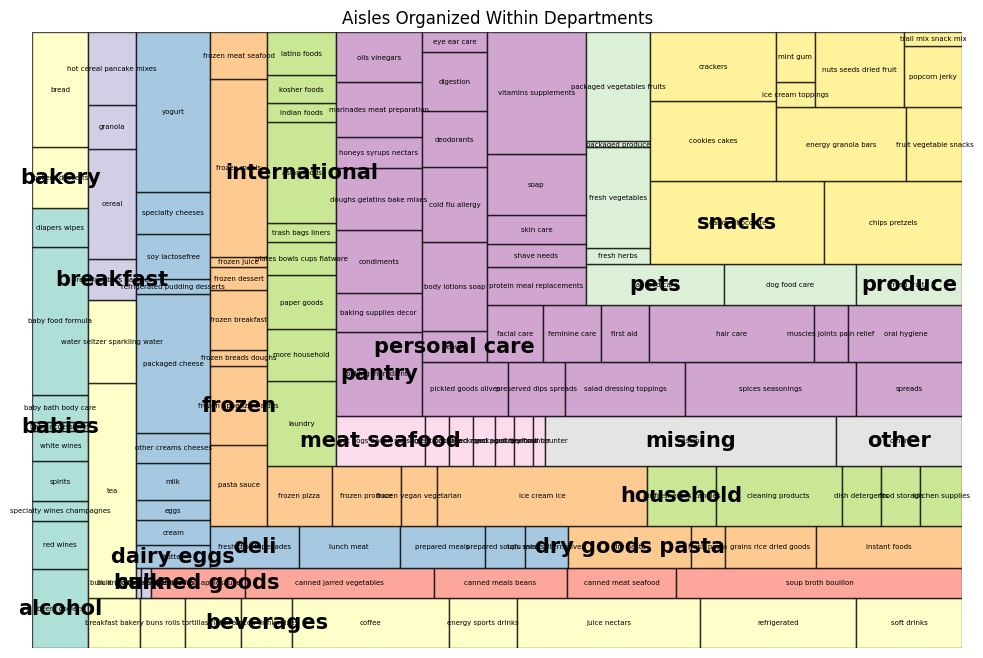

In [106]:
import squarify

# Merge product information with aisles and departments
df = products.merge(aisles, on='aisle_id', how='left')
df = df.merge(departments, on='department_id', how='left')

# Aggregate number of products in each aisle and department
df = df.groupby(['department', 'aisle']).size().reset_index(name='size')

# Aggregate at department level for labeling purposes
department_sizes = df.groupby('department')['size'].sum().reset_index()

# Define colors by department
colors = {dept: plt.cm.Set3(i / len(department_sizes['department'].unique())) for i, dept in enumerate(department_sizes['department'].unique())}
df['color'] = df['department'].map(colors)

# Create treemap layout
sizes = df['size'].tolist()
labels = df['aisle'].tolist()
colors_list = df['color'].tolist()

plt.figure(figsize=(12, 8))
ax = plt.gca()
bounds = squarify.normalize_sizes(sizes, ax.get_xlim()[1], ax.get_ylim()[1])
rects = squarify.squarify(bounds, 0, 0, ax.get_xlim()[1], ax.get_ylim()[1])

# Draw rectangles
for rect, label, color in zip(rects, labels, colors_list):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    ax.add_patch(plt.Rectangle((x, y), dx, dy, facecolor=color, edgecolor='black', alpha=0.7))
    ax.text(x + dx / 2, y + dy / 2, label, ha='center', va='center', fontsize=5)  # Reduced font size

# Overlay department labels at appropriate positions
department_positions = {}
for rect, dept in zip(rects, df['department']):
    if dept not in department_positions:
        department_positions[dept] = (rect['x'] + rect['dx'] / 2, rect['y'] + rect['dy'] / 2)

for dept, (x, y) in department_positions.items():
    ax.text(x, y, dept, fontsize=15, fontweight='bold', ha='center', va='center', color='black')  # Reduced department font size

plt.axis('off')
plt.title("Aisles Organized Within Departments")
plt.show()
